# OpenML in Python 
(Work in progress)  
Joaquin Vanschoren @joavanschoren

## How to...
- Download datasets and tasks
- Use scikit-learn to build classifiers
- Upload the results to the server


# Setup

## Authentication
Via API key (e.g. 'rgu9hw1h03g24j974hr3586g4j598fgh')  
Always keep it secret

Go to your OpenML account settings and see 'API authentication' to retrieve your key. 
<center><img src="files/openml_login.png" width="800"></center>

## Installation
Via source

In [1]:
#! git clone https://github.com/openml/openml-python.
#! cd openml-python
#! python setup.py install

## Setup

In [2]:
from sklearn import preprocessing, ensemble

import openml
import numpy as np
import pandas as pd
import os

# assumes you have your api key in ~/.openml/config
# amueller's read/write key that he will throw away later
openml.config.apikey='610344db6388d9ba34f6db45a3cf71de'

# Data

## List ALL the datasets

In [3]:
datasets = openml.datasets.list_datasets()

data = pd.DataFrame(datasets)
print("First 10 of %s datasets..." % len(datasets))
print(data[:10][['did','name','NumberOfInstances','NumberOfFeatures']])

First 10 of 3181 datasets...
   did             name  NumberOfInstances  NumberOfFeatures
0    1           anneal                898                39
1    2           anneal                898                39
2    3         kr-vs-kp               3196                37
3    4            labor                 57                17
4    5       arrhythmia                452               280
5    6           letter              20000                17
6    7        audiology                226                70
7    8  liver-disorders                345                 7
8    9            autos                205                26
9   10            lymph                148                19


Subset based on any property

In [4]:
bin_data = data.loc[data['NumberOfClasses'] == 2]
print("First 10 of %s datasets..." % len(bin_data))
print(bin_data[:10][['did','name', 'NumberOfInstances','NumberOfFeatures']])

First 10 of 599 datasets...
    did            name  NumberOfInstances  NumberOfFeatures
2     3        kr-vs-kp               3196                37
3     4           labor                 57                17
12   13   breast-cancer                286                10
14   15        breast-w                699                10
23   24        mushroom               8124                23
24   25           colic                368                28
26   27           colic                368                23
28   29        credit-a                690                16
30   31        credit-g               1000                21
32   33  cylinder-bands                540                40


Subset based on any property

In [5]:
big_data = data.loc[data['NumberOfInstances'] > 60000]
big_data = big_data.sort_values(by='NumberOfInstances', ascending=True)
print("First 10 of %s datasets..." % len(bin_data))
print(big_data[:10][['did','name', 'NumberOfInstances']])

First 10 of 599 datasets...
       did                          name  NumberOfInstances
1302  1588                           w8a              64700
2421  4533  KEGGMetabolicReactionNetwork              65554
1305  1591                     connect-4              67557
423    554                     mnist_784              70000
1293  1578                      real-sim              72309
1062  1213                       BNG(mv)              78732
2420  4532                         higgs              98050
247    357                vehicle_sensIT              98528
1080  1242                   vehicleNorm              98528
1307  1593       SensIT-Vehicle-Combined              98528


Download a specific dataset. This is done based on the dataset ID (called 'did' in the table above).

In [6]:
dataset = openml.datasets.get_dataset(61)

print("This is dataset '%s', the target feature is called '%s'" % (dataset.name, dataset.default_target_attribute))
print("URL: %s" % dataset.url)
print(dataset.description[:500])

This is dataset 'iris', the target feature is called 'class'
URL: http://www.openml.org/data/download/61/dataset_61_iris.arff
**Author**: R.A. Fisher  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Iris) - 1936 - Donated by Michael Marshall  
**Please cite**:   

**Iris Plants Database**  
This is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class 


In [7]:
from pprint import pprint
pprint(vars(dataset))

{'citation': None,
 'collection_date': '1936',
 'contributor': None,
 'creator': 'R.A. Fisher',
 'data_file': '/home/andy/.openml/cache/datasets/61/dataset.arff',
 'data_pickle_file': '/home/andy/.openml/cache/datasets/61/dataset.pkl',
 'default_target_attribute': 'class',
 'description': '**Author**: R.A. Fisher  \n'
                '**Source**: '
                '[UCI](https://archive.ics.uci.edu/ml/datasets/Iris) - 1936 - '
                'Donated by Michael Marshall  \n'
                '**Please cite**:   \n'
                '\n'
                '**Iris Plants Database**  \n'
                'This is perhaps the best known database to be found in the '
                "pattern recognition literature.  Fisher's paper is a classic "
                'in the field and is referenced frequently to this day.  (See '
                'Duda & Hart, for example.)  The data set contains 3 classes '
                'of 50 instances each, where each class refers to a type of '
                

Get the actual data

In [8]:
X, y, attribute_names = dataset.get_dataset(target=dataset.default_target_attribute, return_attribute_names=True)
iris = pd.DataFrame(X, columns=attribute_names)
iris['class'] = y
print(iris[:10])

   sepallength  sepalwidth  petallength  petalwidth  class
0          5.1         3.5          1.4         0.2      0
1          4.9         3.0          1.4         0.2      0
2          4.7         3.2          1.3         0.2      0
3          4.6         3.1          1.5         0.2      0
4          5.0         3.6          1.4         0.2      0
5          5.4         3.9          1.7         0.4      0
6          4.6         3.4          1.4         0.3      0
7          5.0         3.4          1.5         0.2      0
8          4.4         2.9          1.4         0.2      0
9          4.9         3.1          1.5         0.1      0


Have fun with it

In [9]:
iris.plot(kind='scatter', x='petallength', y='petalwidth', c='class', s=50);

Train a scikit-learn model on the data

In [10]:
dataset = openml.datasets.get_dataset(61)
X, y = dataset.get_dataset(target=dataset.default_target_attribute)
clf = ensemble.RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
# Helper code by Gilles Louppe
% matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def plot_surface(clf, X, y, 
                 xlim=(0, 7), ylim=(0, 3), n_steps=250, 
                 subplot=None, show=True):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)
        
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps), 
                         np.linspace(ylim[0], ylim[1], n_steps))
    
    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    
    if show:
        plt.show()

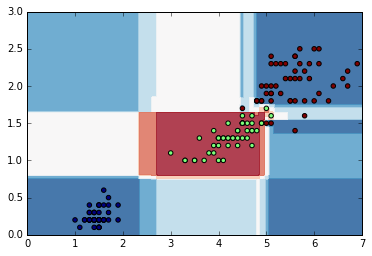

In [12]:
X_2d = X[:,2:4]
clf.fit(X_2d, y)
plot_surface(clf, X_2d, y)

You can also ask which features are categorical to do your own encoding

In [13]:
X, y, categorical = dataset.get_dataset(target=dataset.default_target_attribute,return_categorical_indicator=True)
enc = preprocessing.OneHotEncoder(categorical_features=categorical)
X = enc.fit_transform(X)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Tasks

To run benchmarks consistently (also across studies and tools), OpenML offers Tasks, which include specific train-test splits and other information.

## List ALL the tasks

In [14]:
task_list = openml.tasks.list_tasks()

tasks = pd.DataFrame(task_list)
print("First 5 of %s tasks:" % len(tasks))
print(tasks[:5][['tid','did','name','task_type','estimation_procedure']])

First 5 of 1906 tasks:
   tid  did        name                  task_type     estimation_procedure
0    1    1      anneal  Supervised Classification  10-fold Crossvalidation
1    2    2      anneal  Supervised Classification  10-fold Crossvalidation
2    3    3    kr-vs-kp  Supervised Classification  10-fold Crossvalidation
3    4    4       labor  Supervised Classification  10-fold Crossvalidation
4    5    5  arrhythmia  Supervised Classification  10-fold Crossvalidation


## Download tasks

In [15]:
task = openml.tasks.get_task(10)
print(task)

OpenMLTask instance.
Task ID: 10
Task type: Supervised Classification
Dataset id: 10


# Runs

Run a scikit-learn classifier on the task (using the right splits)

In [16]:
from openml.runs import run_task

clf = ensemble.RandomForestClassifier()
run = run_task(task, clf)
print("RandomForest has run on the task.")

2823
RandomForest has run on the task.


Upload the run to the OpenML server

In [17]:
import xmltodict

return_code, response = run.publish()

if(return_code == 200):
    response_dict = xmltodict.parse(response)
    run_id = response_dict['oml:upload_run']['oml:run_id']
    print("Uploaded run with id %s" % (run_id))
    print("Check it at www.openml.org/r/%s" % (run_id))

Uploaded run with id 538021
Check it at www.openml.org/r/538021


More to come soon...